<a href="https://colab.research.google.com/github/Drisya-Ponmari/UST_INTERN/blob/master/Question_answer_model/Question_answer_generation_fine_tune_Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.DATASET**
Stanford Question Answering Dataset(SQuAD)

#**2.MODEL - KEY COMPONENTS**

**Embeding Layer**
*   The training dataset consist of context and corresponding Questions
*   So we need to convert to vectors . (Tokenizer Library can be used)  

**Encoder Layer**
* RNN with Attention mechanism can be used (transformer library)

Dot product Attention Mechanism
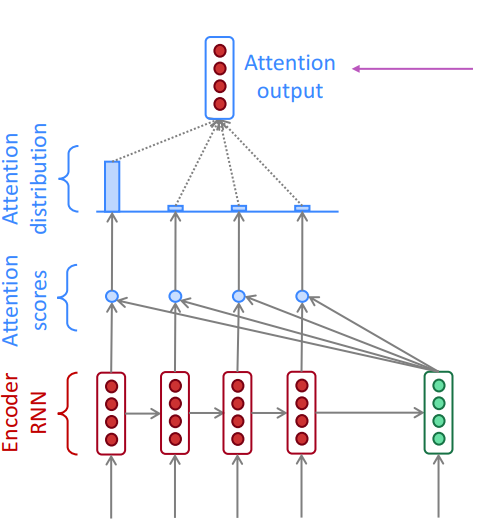



The dot product attention would be that for each context vector ci each question vector qj is multiplied to get ei.Soft max over ei get alpha.Finally calculate the producat of the attention distribution alpha and the corresponding question vector

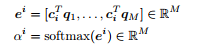
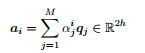

**More Complex Attention - BiDAF Attention**
Running SQuAD over BiADF will result in greater performance .Because Attention can be achieved bothways in this. i.e **from the context to question and question to context**



#**3.QUESTION ANSWER MODEL -FINE TUNED BERT**#

Task: Given a question and a passage of text containing the answer , BERT needs to highlight the "span" of text corresponding to the correct answer

Dataset : SQuaD (understanding Squad Dataset)

Model : 
For Quesion answering we use BertForQuestionAnswering class from the transformers library.

This class supports fine-tuning, but for this example we will keep things simpler and load a BERT model that has already been fine-tuned for the SQuAD benchmark.

Documentation : https://huggingface.co/transformers/pretrained_models.html


**BERT INPUT FORMAT**

As input we take both input and the context(i.e reference text)


To feed a QA task into BERT, we pack both the question and the reference text into the input.

![Input format for QA](http://www.mccormickml.com/assets/BERT/SQuAD/input_formatting.png)

The two pieces of text are separated by the special `[SEP]` token. 

BERT also uses "Segment Embeddings" to differentiate the question from the reference text. These are simply two embeddings (for segments "A" and "B") that BERT learned, and which it adds to the token embeddings before feeding them into the input layer. (SEGMENT EMBEDINGS)

BERT needs to highlight a "span" of text containing the answer--this is represented as simply predicting which token marks the start of the answer, and which token marks the end.

![Start token classification](http://www.mccormickml.com/assets/BERT/SQuAD/start_token_classification.png)

For every token in the text, we feed its final embedding into the start token classifier. The start token classifier only has a single set of weights (represented by the blue "start" rectangle in the above illustration) which it applies to every word.

After taking the dot product between the output embeddings and the 'start' weights, we apply the softmax activation to produce a probability distribution over all of the words. Whichever word has the highest probability of being the start token is the one that we pick.

We repeat this process for the end token--we have a separate weight vector this.

![End token classification](http://www.mccormickml.com/assets/BERT/SQuAD/end_token_classification.png)


Standford paper: https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1194/reports/default/15848021.pdf

**EXAMPLE**

In [ ]:
!pip install transformers

     |████████████████████████████████| 778kB 2.8MB/s 
     |████████████████████████████████| 1.1MB 8.8MB/s 
     |████████████████████████████████| 3.0MB 18.3MB/s 
     |████████████████████████████████| 890kB 44.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=7af486e64392f82699b050921488ab9d2992004f3e45d1a1c4cf6da9fc3b6e3d
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import torch

In [ ]:
#fine tuned model
from transformers import BertForQuestionAnswering

model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')


In [ ]:
#Bert tokenizer
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

#**4.TESTING THE MODEL**#

In [ ]:
#input consists of Question and a context 
question = "How many layers"
answer_text = "BERT-large is really big... it has 24-layers and an embedding size of 1,024, for a total of 340M parameters! Altogether it is 1.34GB, so expect it to take a couple minutes to download to your Colab instance."

In [ ]:
# Apply the tokenizer to the input text, treating them as a text-pair. Question and context is concatenated with [SEP] token
input_ids = tokenizer.encode(question, answer_text)

print('The input has a total of {:} tokens.'.format(len(input_ids)))

The input has a total of 64 tokens.


In [ ]:
# BERT only needs the token IDs, but for the purpose of inspecting the 
# tokenizer's behavior, let's also get the token strings and display them.
tokens = tokenizer.convert_ids_to_tokens(input_ids)

# For each token and its id...
for token, id in zip(tokens, input_ids):
    
    # If this is the [SEP] token, add some space around it to make it stand out.
    if id == tokenizer.sep_token_id:
        print('')
    
    # Print the token string and its ID in two columns.
    print('{:<12} {:>6,}'.format(token, id))

    if id == tokenizer.sep_token_id:
        print('')
    

[CLS]           101
how           2,129
many          2,116
layers        9,014

[SEP]           102

bert         14,324
-             1,011
large         2,312
is            2,003
really        2,428
big           2,502
.             1,012
.             1,012
.             1,012
it            2,009
has           2,038
24            2,484
-             1,011
layers        9,014
and           1,998
an            2,019
em            7,861
##bed         8,270
##ding        4,667
size          2,946
of            1,997
1             1,015
,             1,010
02            6,185
##4           2,549
,             1,010
for           2,005
a             1,037
total         2,561
of            1,997
340          16,029
##m           2,213
parameters   11,709
!               999
altogether   10,462
it            2,009
is            2,003
1             1,015
.             1,012
34            4,090
##gb         18,259
,             1,010
so            2,061
expect        5,987
it            2,00

*Note::We've concatenated the question and answer_txt together, but BERT still needs to distinguish .. BERT has two special "Segment" embeddings, one for segment "A" and one for segment "B". Before the word embeddings go into the BERT layers, the segment A embedding needs to be added to the question tokens, and the segment B embedding needs to be added to each of the answer_text tokens.

These additions are handled for us by the transformer library, and all we need to do is specify a '0' or '1' for each token.

Note: In the transformers library, huggingface likes to call these token_type_ids, but I'm going with segment_ids since this seems clearer, and is consistent with the BERT paper.*

In [ ]:
# Search the input_ids for the first instance of the `[SEP]` token.
sep_index = input_ids.index(tokenizer.sep_token_id)

# The number of segment A tokens includes the [SEP] token istelf.
num_seg_a = sep_index + 1

# The remainder are segment B.
num_seg_b = len(input_ids) - num_seg_a

# Construct the list of 0s and 1s.
segment_ids = [0]*num_seg_a + [1]*num_seg_b

# There should be a segment_id for every input token.
assert len(segment_ids) == len(input_ids)

In [ ]:
# Run our example through the model.
start_scores, end_scores = model(torch.tensor([input_ids]), # The tokens representing our input text.
                                 token_type_ids=torch.tensor([segment_ids])) # The segment IDs to differentiate question from answer_text


In [ ]:
# Find the tokens with the highest `start` and `end` scores.
answer_start = torch.argmax(start_scores)
answer_end = torch.argmax(end_scores)

# Combine the tokens in the answer and print it out.
answer = ' '.join(tokens[answer_start:answer_end+1])

print('Answer: "' + answer + '"')

Answer: "24"


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
#sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (16,8)

#**5.Visualising the Scores**#

In [ ]:
# Pull the scores out of PyTorch Tensors and convert them to 1D numpy arrays.
s_scores = start_scores.detach().numpy().flatten()
e_scores = end_scores.detach().numpy().flatten()

# We'll use the tokens as the x-axis labels. In order to do that, they all need
# to be unique, so we'll add the token index to the end of each one.
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))


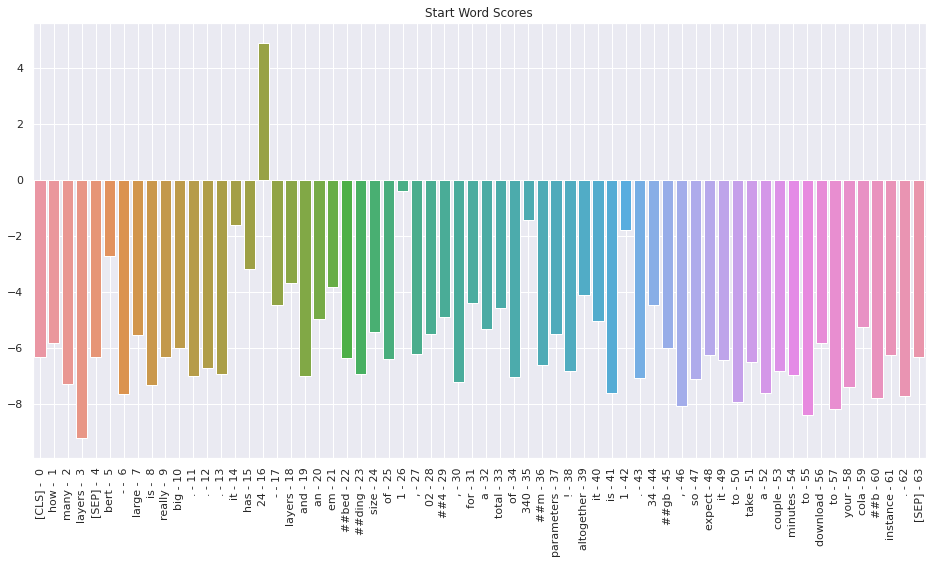

In [ ]:
# Create a barplot showing the start word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=s_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('Start Word Scores')

plt.show()

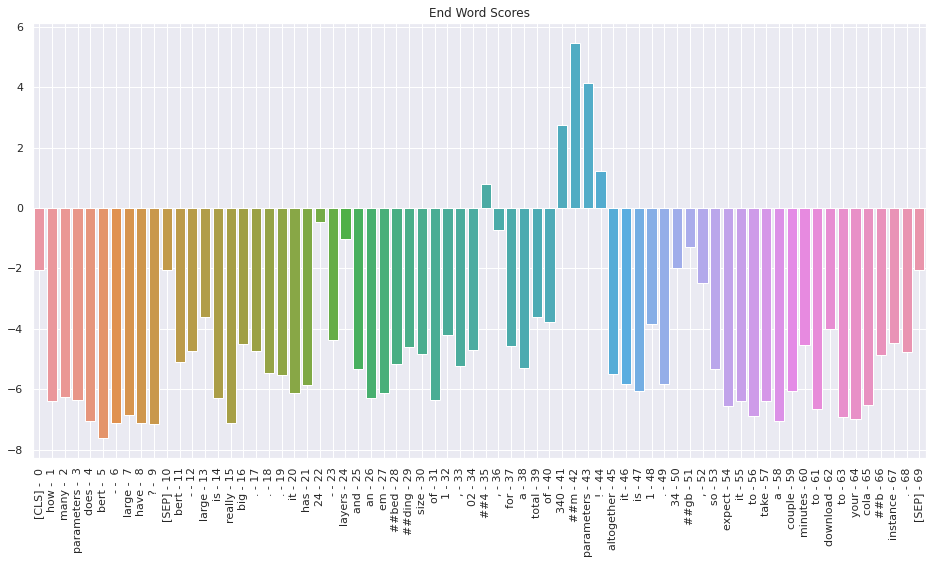

In [ ]:
# Create a barplot showing the end word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=e_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('End Word Scores')

plt.show()